## Introduction + Single-layer neural network for regression problem

첫 수업에서는 딥러닝이 정확하게 어떤 알고리즘이며, 왜 현재의 인공지능 붐을 주도하게 되었는지 설명합니다. 또한, 사람들이 기존의 딥러닝 수업 방식을 어려워하는 이유와 이번 수업에서는 이 문제점을 어떻게 해결했는지 알려드립니다.

강의에 대한 소개가 끝나면, 먼저 가장 기본적인 딥러닝 알고리즘인 Single-layer neural network 알고리즘을 배우고 이를 직접 구현해봅니다. 가장 단순한 구현 방식(ex: Random Search)부터 시작해, 가장 효과적이며 모든 딥러닝 알고리즘의 기본이 되는 Gradient Descent 알고리즘까지 직접 구현합니다.

Single-layer neural network의 원리와 구현 방법을 배웠으면, 보스턴의 부동산 관련 정보를 데이터로 정리한 Boston housing dataset 을 활용해 부동산의 집값을 예측하는 알고리즘을 Single-layer neural network로 구현합니다.

- 땡 파이썬으로 짠다.
    - 훨씬 더 간결하다.
    - 알고리즘 튜닝으로 파악하며 공부하기
- 말로만 설명하지 않고, 직접 코드를 작성하여 맞는지 증명
    - 원리를 이해하고 써먹을 수 있게
- 복잡한 표현은 최대한 생략하고, 꼭 필요한 경우만 자세히 설명

## 실습 시작!!!

In [1]:
import numpy as np

In [2]:
np.random.uniform(low=0.0, high=1.0)

# uniform 분포 은 주사위 분포라고 이해해도 된다. 0 에서 1 사이를 랜덤으로~

0.7813261058495204

## Generate dataset

실험에 필요한 데이터셋 만들기!!

**Supervised learning 을 위해서는 Feature, label 필요**

In [25]:
# feature

X = np.random.uniform(low=0.0, high=1.0, size=100)
print(X.shape)

print(X[0:10])

(100,)
[ 0.51336251  0.89845724  0.03981069  0.92382684  0.29262298  0.23589124
  0.94743373  0.86395146  0.44615393  0.55125403]


In [27]:
# Label

y = X * 0.3
print(y.shape)
print(y[0:10])

# y 에 넣은 값으로 맞춰야 한다.

(100,)
[ 0.15400875  0.26953717  0.01194321  0.27714805  0.08778689  0.07076737
  0.28423012  0.25918544  0.13384618  0.16537621]


## 시각화하기

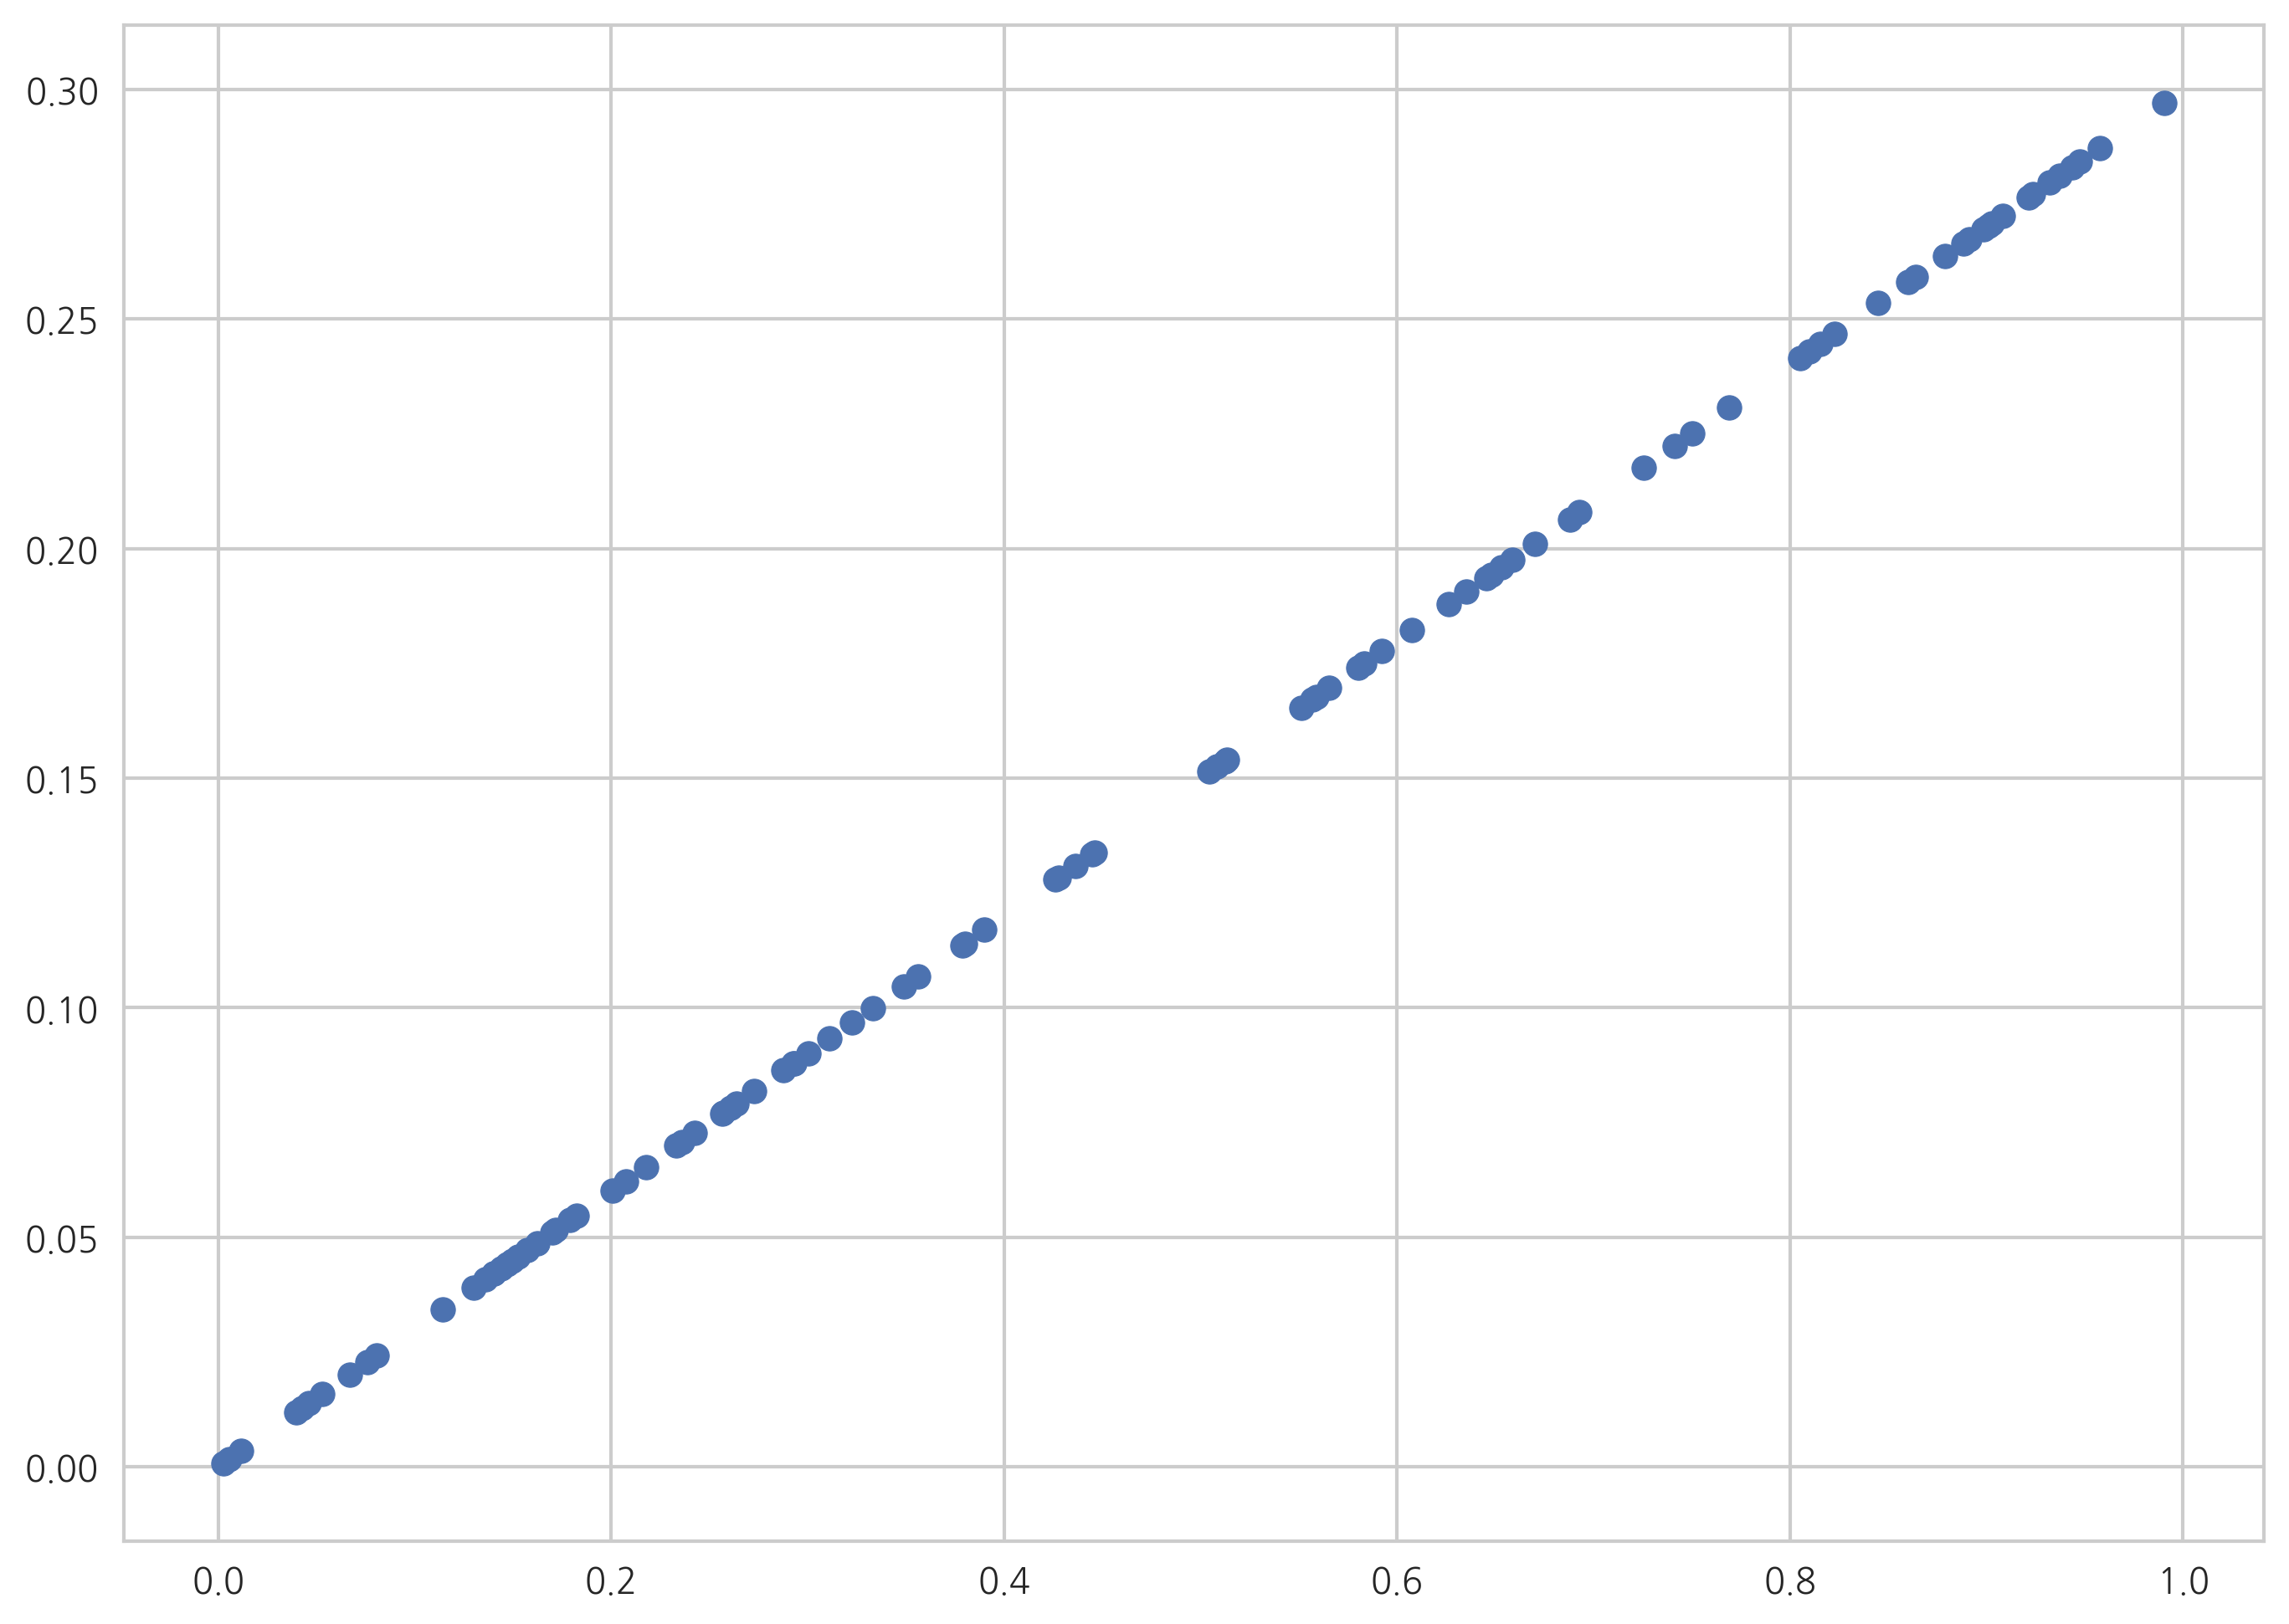

In [29]:
plt.scatter(X, y)
plt.show()

## noise 넣기

맞추기 쉬워 보이니 0.3 보다 약간 미묘하게 0.22 가 들어가도록 의도적으로 노이즈를 주자!!

In [32]:
# noise 만들기
y = X * 0.3 + (np.random.uniform(low=0.0, high=1.0, size=100) * 0.01)

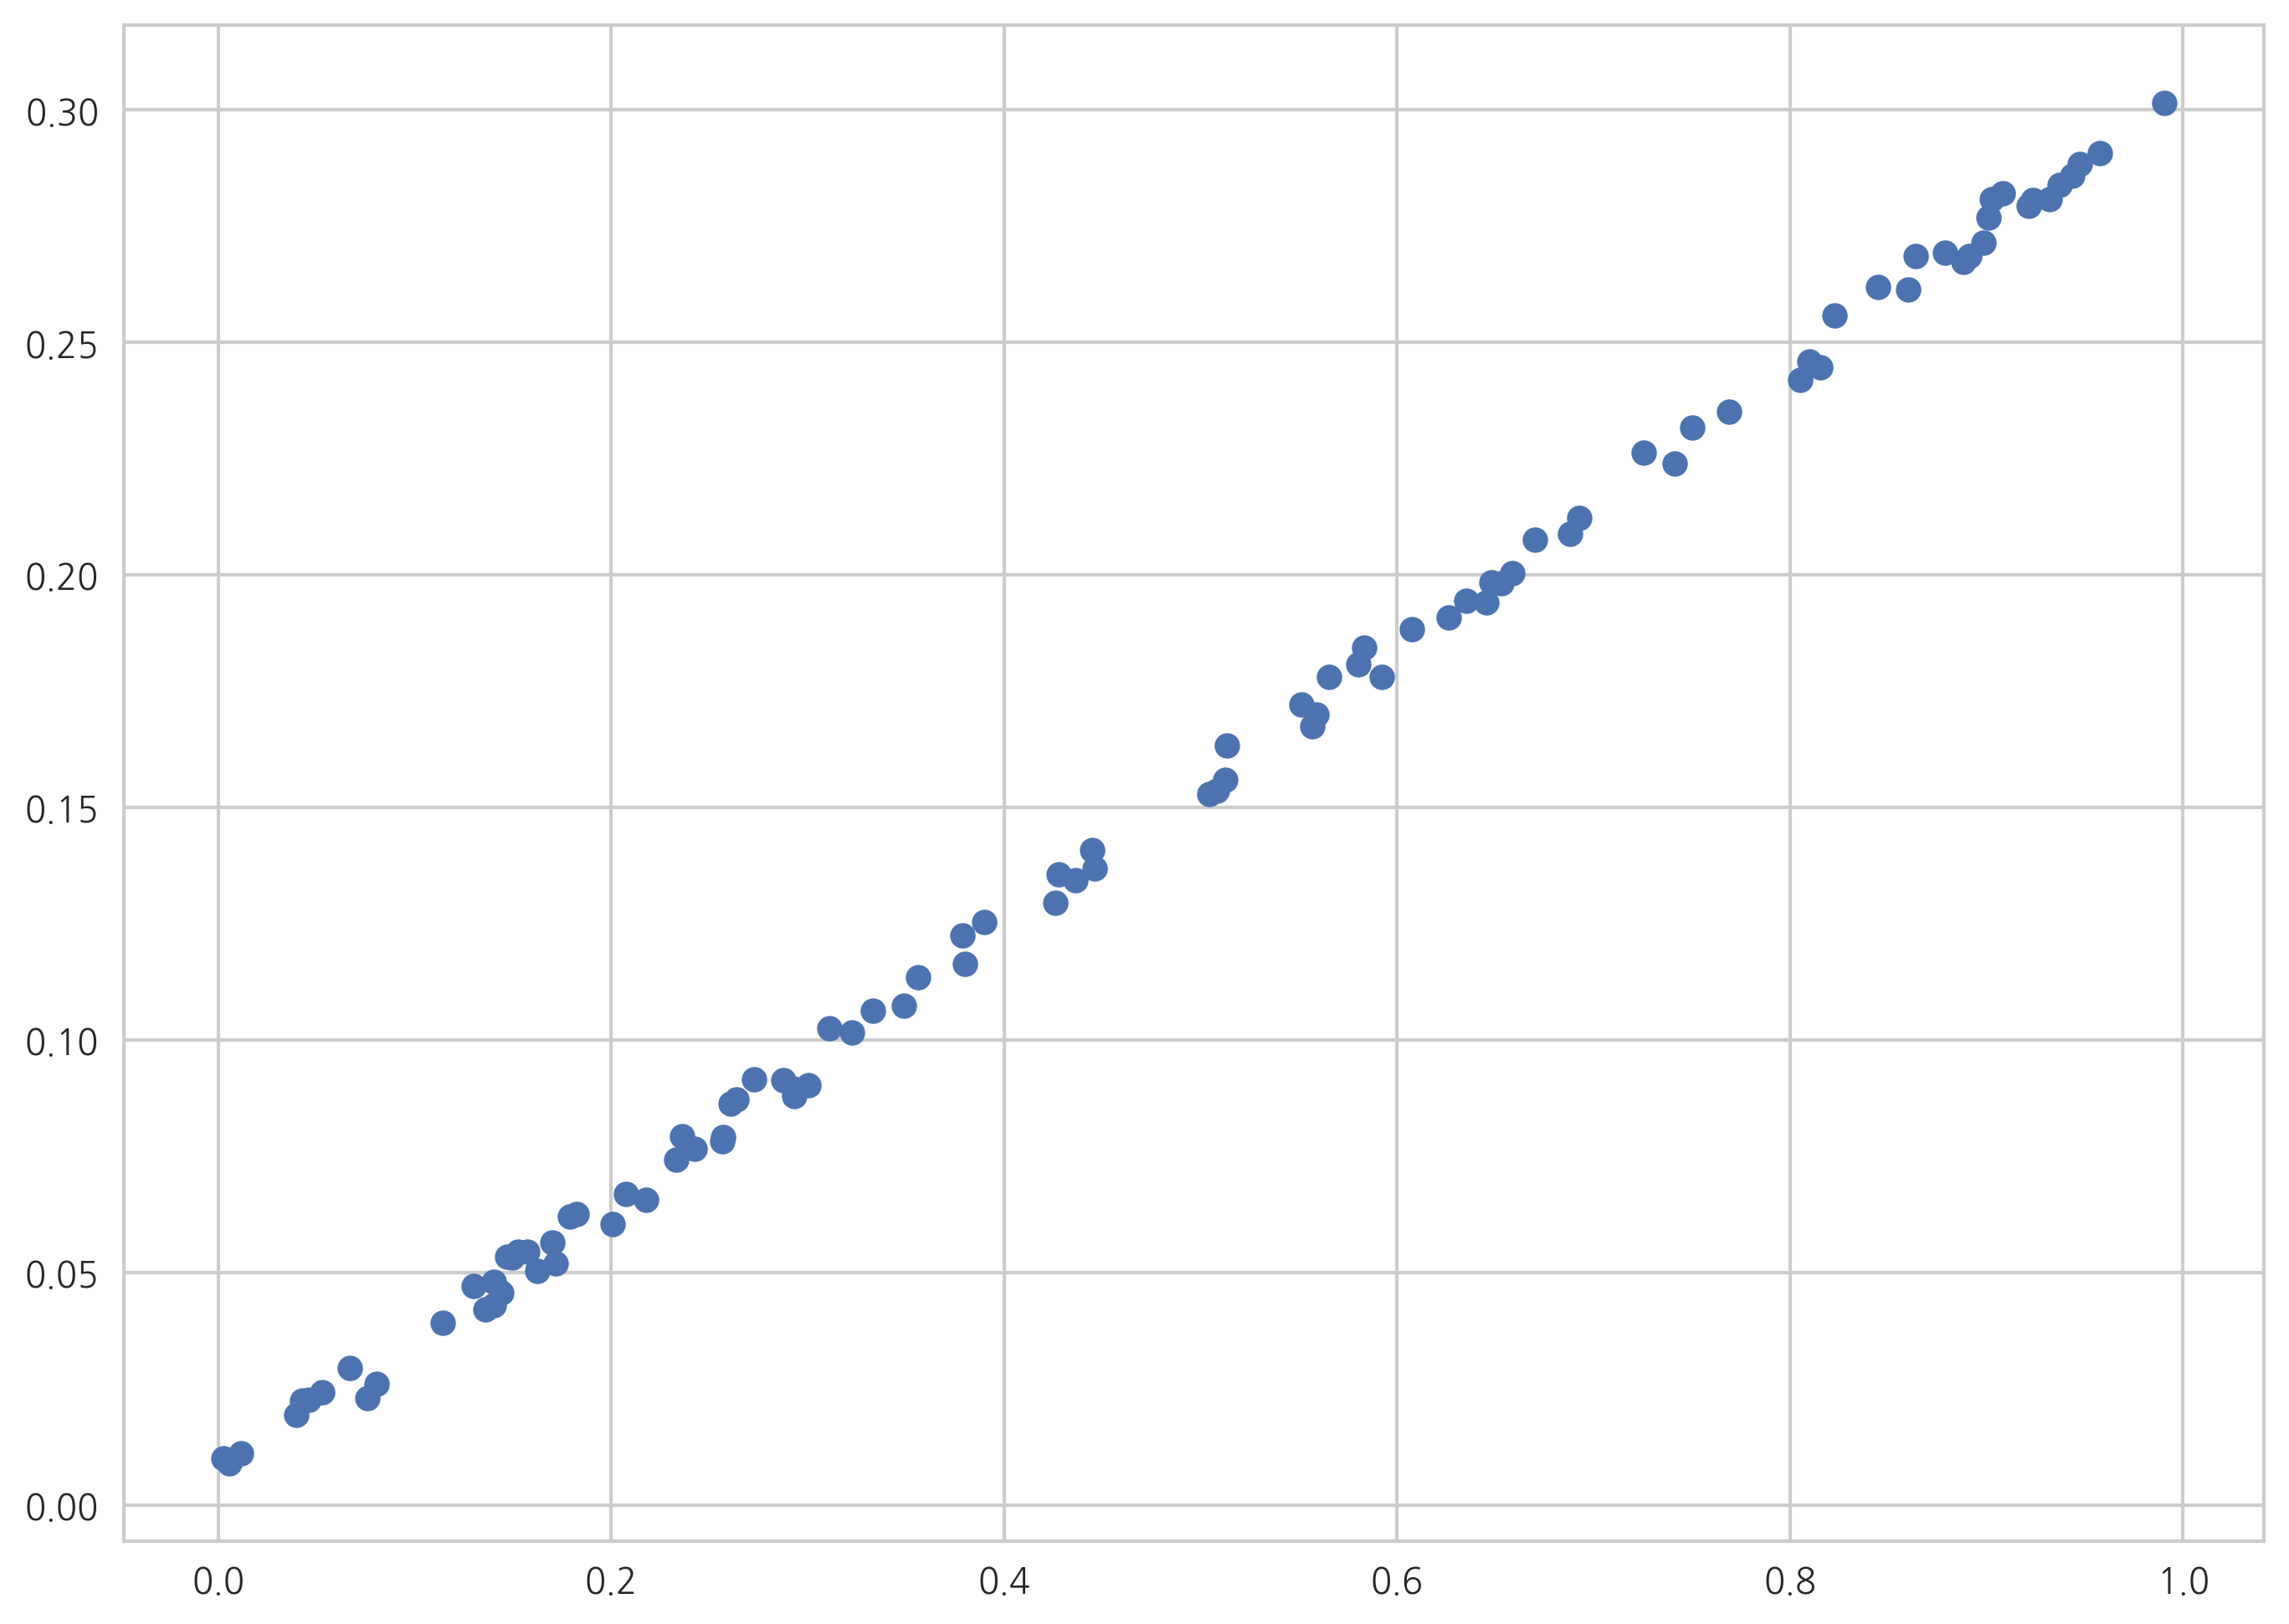

In [33]:
plt.scatter(X, y)
plt.show()

알고리즘이 스스로 위의 noise 를 감안하여 정답을 스스로 찾을 수 있도록 하는 것이 목표!!!

## 데이터셋으로 문제를 풀기 위한 알고리즘 구현

$y = wx$

스스로 w 가 0.3 임을 찾도록 만들기

**그럼 어떻게??**

- 하나씩 다 집어넣어 보기!!

### Case 1 - Random search

랜덤하게 w 에 다집어넣고 좋은 w 를 찾도록 (좋은 w 는 0.3)

In [47]:
num_epoch = 100
# loop 횟수라고 보면 된다.

# Best error,

best_error = 999
best_w = None

for epoch in range(num_epoch):
    w = np.random.uniform(low=0.0, high=1.0)
    # w 가 0.3 이면 베스트. 좋은거냐 나쁘냐는 y 값에 얼마나 근접했는지 확인하자
    y_predict = X * w
    
    # 차이를 발견할 때 절대값을 씌우고 더하기
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w = w
    
        print("*{0:2} w = {1:.5f}, eeerror = {2:.5f}".format(epoch, w, error))
        
print("-----" * 10)
print("{0:2} w = {1:.5f}, error = {2:.5f}".format(epoch, best_w, best_error))

* 0 w = 0.69002, eeerror = 0.17769
* 1 w = 0.25942, eeerror = 0.02378
*18 w = 0.31594, eeerror = 0.00560
*23 w = 0.31202, eeerror = 0.00443
--------------------------------------------------
99 w = 0.31202, error = 0.00443


In [41]:
best_error

0.0035369805050440035

In [42]:
best_w

0.30543084403815335

### 위 방법의 단점은??

- 느리다.
- 암묵적으로 값이 나올 범위를 알고 잡은 티가 너무 난다.

### Case 2 - h-step Search

Gradient 채킹 알고리즘을 심플하게 만들기

- 우리가 알고 있는 w 는 0.3 이다.
- 알고리즘은 랜덤하게 w 값을 찾고 있다. 0.0 ~ 1.0
    - 0.1 을 해보니 에러가 낮아졌다. 그리고 0.2 로 갔더니 더 낮아졌다. 0.3 으로 가니 더 낮아졌다. 그런데 0.4 로 가니 에러가 올라갔다.
    - 그래서 0.3 이 최고의 값이구나 하고 판단할 수 있다.
    - 낮은 에러를 찾기 위해 시도할 값의 간격은 임의로 선택 가능

In [89]:
num_epoch = 100

w = np.random.uniform(low=0.0, high=1.0)
w = 0.0
h = 0.1

for epoch in range(num_epoch):
    y_predict = X * w
    current_error = np.abs(y_predict - y).mean()
    
    y_predict = X * (w + h)
    h_plus_error = np.abs(y_predict - y).mean()
    
    if h_plus_error < current_error:
        w = w + h
        continue
    
    break
    
print("{0} w = {1:.5f}, error = {2:.5f}".format(epoch, w, current_error))

3 w = 0.30000, error = 0.00482


#### h_minus 버전

- 이 방식의 문제점은???
    - ㅇ

In [99]:
# 원래 값

#num_epoch = 100

#w = np.random.uniform(low=0.0, high=1.0)
#h = 0.01


num_epoch = 1000

w = np.random.uniform(low=0.0, high=1.0)
h = 0.0001

for epoch in range(num_epoch):
    y_predict = X * w
    current_error = np.abs(y_predict - y).mean()
    
    y_predict = X * (w + h)
    
    h_plus_error = np.abs(y_predict - y).mean()
    if h_plus_error < current_error:
        w = w + h
        continue
        
    y_predict = X * (w - h)
    h_minus_error = np.abs(y_predict - y).mean()
    if h_minus_error < current_error:
        w = w - h
        continue
    
    break
    
print("{0} w = {1:.5f}, error = {2:.5f}".format(epoch, w, current_error))

348 w = 0.30571, error = 0.00353


### 이 case2 방식의 문제점은???

이 방식은 쉽게 말해서 왼쪽으로 + 1 오른쪽으로 + 1 의 방식!!

- h 가 작을수록 loop 를 많이 돈다.
    - 원래값과 비교해보자!!
- 어떻게 해결할까???
    - h 를 스스로 조절할 수 있도록 해주면 좋겠다.
    - 그리고 거의 자동화에 근접할 수 있다.

## Case 3 - Gradient Descent 미완성

- 코드가 꽤 깔끔해진다.

In [111]:
num_epoch = 100

# 루프 돌기 전에 w 초기화
w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = X * w
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.005:
        break
    
    w = w - (y_predict - y).mean()
    
    print("*{0:2} w = {1:.5f}, error = {2:.5f}".format(epoch, w, error))
    
print("----" * 10)
print("{0:2} w = {1:.5f}, error = {2:.5f}".format(epoch, w, error))

* 0 w = 0.36173, error = 0.04585
* 1 w = 0.33772, error = 0.02505
* 2 w = 0.32493, error = 0.01431
* 3 w = 0.31811, error = 0.00898
* 4 w = 0.31447, error = 0.00633
* 5 w = 0.31254, error = 0.00515
----------------------------------------
 6 w = 0.31254, error = 0.00458


## 정리

맞출 수 있는 3가지 알고리즘을 짜 봤습니다.

- 랜덤 서치는 정말 무식한 방법. 우리가 랜덤 범위를 정해놓아서 그렇지(0.0 부터 1.0) 정말 시간이 걸린다.
- h-step 은 왼쪽으로 +1, 오른쪽으로 +1 하며 찾아나가기. 최적의 에러가 나올 때 까지 한 단계씩 나아간다.
- Gradient : h 를 직접 찾도록 유도해서 효율적으로!!

## Feature 를 두개 넣어보자!!

In [3]:
# feature

X1 = np.random.uniform(low=0.0, high=1.0, size=100)
print(X1.shape)

print(X1[0:10])

(100,)
[ 0.05269405  0.17448537  0.84168628  0.41117852  0.76917948  0.29489957
  0.64402008  0.77090373  0.87247519  0.25203335]


In [4]:
# feature

X2 = np.random.uniform(low=0.0, high=1.0, size=100)
print(X2.shape)

print(X2[0:10])

(100,)
[ 0.09672523  0.66198202  0.88090137  0.37686955  0.31992439  0.65170545
  0.35152363  0.22417193  0.53612249  0.55657257]


In [7]:
y = X1 * 0.3 + X2 * 0.5 + (np.random.uniform(low=0.0, high=1.0, size=100) * 0.01)
print(y[0:10])

[ 0.072005    0.38828187  0.70257268  0.31787274  0.39128574  0.42162283
  0.36905072  0.34968386  0.5370485   0.36067698]


### 이제 차원이 3차원이 되었다!!

### Case 1 - Random search

랜덤하게 w 에 다집어넣고 좋은 w 를 찾도록 (좋은 w 는 0.3)

In [11]:
num_epoch = 10000
# loop 횟수라고 보면 된다. 이 과정에서 기본값 1000

# Best error,

best_error = np.inf
best_w1 = None
best_w2 = None

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    
    # w 가 0.3 이면 베스트. 좋은거냐 나쁘냐는 y 값에 얼마나 근접했는지 확인하자
    y_predict = X1 * w1 + X2 * w2
    
    # 차이를 발견할 때 절대값을 씌우고 더하기
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
    
        print("*{0:2} w1 = {1:.5f}, w2 = {2:.5f} error = {3:.5f}".format(epoch, w1, w2, error))
        
print("-----" * 10)
print("{0:2} w1 = {1:.5f}, w2 = {2:.5f} error = {3:.5f}".format(epoch, best_w1, best_w2, best_error))

* 0 w1 = 0.30796, w2 = 0.21581 error = 0.13572
* 1 w1 = 0.40333, w2 = 0.45754 error = 0.03445
* 8 w1 = 0.30970, w2 = 0.54486 error = 0.02166
*12 w1 = 0.35036, w2 = 0.45328 error = 0.01514
*259 w1 = 0.27220, w2 = 0.54521 error = 0.01102
*398 w1 = 0.28744, w2 = 0.53328 error = 0.00837
*1111 w1 = 0.27780, w2 = 0.52981 error = 0.00801
*1318 w1 = 0.31901, w2 = 0.47828 error = 0.00800
*1354 w1 = 0.30409, w2 = 0.49375 error = 0.00573
*2789 w1 = 0.29773, w2 = 0.50786 error = 0.00322
--------------------------------------------------
9999 w1 = 0.29773, w2 = 0.50786 error = 0.00322


## 3차원이 되어 랜덤 서치를 해서 생기는 문제는???
- w 가 하나 늘어남으로 속도가 느려진다.
    - 1000번 돌렸다고 저것이 best 값인지 알기 어렵다.
    - 그래서 epoch 을 늘려야 하는데, 결국은 시간이 늘어난다.
- 찾긴 찾되 쓸 수 없는 방식이다.!!!!

## Case 2 - h-step 는 강의중에 패쓰!!

In [ ]:
# 원래 값

#num_epoch = 100

#w = np.random.uniform(low=0.0, high=1.0)
#h = 0.01


num_epoch = 1000

w = np.random.uniform(low=0.0, high=1.0)
h = 0.0001

for epoch in range(num_epoch):
    y_predict = X * w
    current_error = np.abs(y_predict - y).mean()
    
    y_predict = X * (w + h)
    
    h_plus_error = np.abs(y_predict - y).mean()
    if h_plus_error < current_error:
        w = w + h
        continue
        
    y_predict = X * (w - h)
    h_minus_error = np.abs(y_predict - y).mean()
    if h_minus_error < current_error:
        w = w - h
        continue
    
    break
    
print("{0} w = {1:.5f}, error = {2:.5f}".format(epoch, w, current_error))

## Case 3 - Gradient Descent (미완성) 

In [23]:
num_epoch = 100

# 루프 돌기 전에 w 초기화
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = X1 * w1 + X2 * w2
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.005:
        break
    
    w1 = w1 - ((y_predict - y) * X1).mean()
    w2 = w2 - ((y_predict - y) * X2).mean()
    
    # 업데이트량을 다르게 해야 한다. (w1, w2 를 서로 다르게 작게, 크게 업데이트 하는 것이 필요. 양은 중요하지 않다. 다르다는 것만 알려주면 된다.b)
    if epoch % 10 == 0:
        print("*{0:2} w1 = {1:.5f}, w2 = {2:.5f} error = {3:.5f}".format(epoch, w1, w2, error))
    
print("----" * 10)
print("*{0:2} w1 = {1:.5f}, w2 = {2:.5f} error = {3:.5f}".format(epoch, w1, w2, error))

* 0 w1 = 0.27798, w2 = 0.44658 error = 0.09194
----------------------------------------
* 6 w1 = 0.31479, w2 = 0.49083 error = 0.00496


### 결론
- 위에 랜덤 보다 적은 epoch 으로 0.3 에 근접한 값이 나온다.

## bias (절편??)

- 왜 써야 하나?
    - 

In [24]:
# feature

X1_1 = np.random.uniform(low=0.0, high=1.0, size=100)
print(X1_1.shape)

print(X1_1[0:10])

(100,)
[ 0.84505837  0.62954838  0.33680893  0.25025018  0.74396682  0.62406997
  0.08417058  0.22681951  0.66075596  0.34862986]


In [25]:
# feature

X1_2 = np.random.uniform(low=0.0, high=1.0, size=100)
print(X1_2.shape)

print(X1_2[0:10])

(100,)
[ 0.17008468  0.42180703  0.10084055  0.73987044  0.44188006  0.59843576
  0.06725602  0.45315327  0.60715859  0.90607996]


In [28]:
y = X1_1 * 0.3 + X1_2 * 0.5 + 0.1 + (np.random.uniform(low=0.0, high=1.0, size=100) * 0.01)
print(y[0:10])

[ 0.44325484  0.50818127  0.25962643  0.55367111  0.54424525  0.5928073
  0.1648753   0.40151884  0.60348652  0.65844672]


In [31]:
num_epoch = 10000
# loop 횟수라고 보면 된다. 이 과정에서 기본값 1000

# Best error,

best_error = np.inf
best_w1 = None
best_w2 = None
best_b = None

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    b = np.random.uniform(low=0.0, high=1.0)
    
    # w 가 0.3 이면 베스트. 좋은거냐 나쁘냐는 y 값에 얼마나 근접했는지 확인하자
    y_predict = X1_1 * w1 + X1_2 * w2 + b
    
    # 차이를 발견할 때 절대값을 씌우고 더하기
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_b = b
    
        print("*{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, error))
        
print("-----" * 10)
print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, best_bias = {3:.5f} error = {4:.5f}".format(epoch, best_w1, best_w2, best_b, best_error))

* 0 w1 = 0.07220, w2 = 0.09286, b = 0.71718 error = 0.31476
* 3 w1 = 0.75335, w2 = 0.17788, b = 0.02521 error = 0.11841
*18 w1 = 0.42060, w2 = 0.47298, b = 0.11748 error = 0.06112
*56 w1 = 0.37753, w2 = 0.48144, b = 0.05311 error = 0.02526
*1034 w1 = 0.30441, w2 = 0.52508, b = 0.10426 error = 0.01240
--------------------------------------------------
9999 w1 = 0.30441, w2 = 0.52508, best_bias = 0.10426 error = 0.01240


## bias 는 어떻게 업데이트 하면 좋을까?
- bias 는 X3 에 해당하지만 언제나 값은 1이다.!
    - bias 는 

## Case3 - Gradient

In [40]:
num_epoch = 100

# 루프 돌기 전에 w 초기화
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = X1_1 * w1 + X1_2 * w2 + b
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.005:
        break
    
    w1 = w1 - ((y_predict - y) * X1_1).mean()
    w2 = w2 - ((y_predict - y) * X1_2).mean()
    b = b - (y_predict - y).mean()
    
    # 업데이트량을 다르게 해야 한다. (w1, w2 를 서로 다르게 작게, 크게 업데이트 하는 것이 필요. 양은 중요하지 않다. 다르다는 것만 알려주면 된다.b)
    if epoch % 10 == 0:
        print("*{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, error))
    
print("----" * 10)
print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, best_bias = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, best_error))

* 0 w1 = 0.61690, w2 = 0.66944, b = -0.36868 error = 0.42365
*10 w1 = 0.51310, w2 = 0.61369, b = -0.06410 error = 0.06548
*20 w1 = 0.41456, w2 = 0.55445, b = 0.01761 error = 0.03435
*30 w1 = 0.36149, w2 = 0.52634, b = 0.05971 error = 0.01816
*40 w1 = 0.33304, w2 = 0.51294, b = 0.08148 error = 0.00970
*50 w1 = 0.31782, w2 = 0.50650, b = 0.09278 error = 0.00538
----------------------------------------
52 w1 = 0.31676, w2 = 0.50608, best_bias = 0.09355 error = 0.01240


### 하나를 더 추가해서 Gradient 를 완성하자

- Learning rate
    - 업데이트 양을 조절 할 수 있다.
    - 조절을 하며 w 값이 틀림을 확인해보자!!!
    - weight, bias 업데이트 속도를 조절할 수 있다.
    - 여기서는 러닝 레이트는 1.2 가 적당한듯?

In [41]:
num_epoch = 1000
learning_rate = 1.2

# 루프 돌기 전에 w 초기화
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)


for epoch in range(num_epoch):
    y_predict = X1_1 * w1 + X1_2 * w2 + b
    
    error = np.abs(y_predict - y).mean()
    
    if error < 0.005:
        break
    
    w1 = w1 - learning_rate * ((y_predict - y) * X1_1).mean()
    w2 = w2 - learning_rate * ((y_predict - y) * X1_2).mean()
    b = b - learning_rate * (y_predict - y).mean()
    
    # 업데이트량을 다르게 해야 한다. (w1, w2 를 서로 다르게 작게, 크게 업데이트 하는 것이 필요. 양은 중요하지 않다. 다르다는 것만 알려주면 된다.b)
    if epoch % 10 == 0:
        print("*{0:2} w1 = {1:.5f}, w2 = {2:.5f}, b = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, error))
    
print("----" * 10)
print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, best_bias = {3:.5f} error = {4:.5f}".format(epoch, w1, w2, b, best_error))

* 0 w1 = 0.18959, w2 = 0.29372, b = -0.26530 error = 0.65851
*10 w1 = 0.31789, w2 = 0.47147, b = 0.06286 error = 0.05752
*20 w1 = 0.31414, w2 = 0.49411, b = 0.09659 error = 0.00597
----------------------------------------
22 w1 = 0.31557, w2 = 0.49693, best_bias = 0.10181 error = 0.01240


## 숙제!!!

Boston housing dataset!!
- 집값 데이터, 집값을 맞출 수 있는 도움이 되는 데이터가 있다. (feature, label 이 있다.)
- 

In [52]:
from sklearn.datasets import load_boston
boston = load_boston()

In [53]:
x = boston["data"]


In [54]:
y = boston["target"]
y[0:10]

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,  18.9])

In [59]:
data = pd.DataFrame(x, columns=boston["feature_names"])

data["PRICE"] = y

In [60]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
